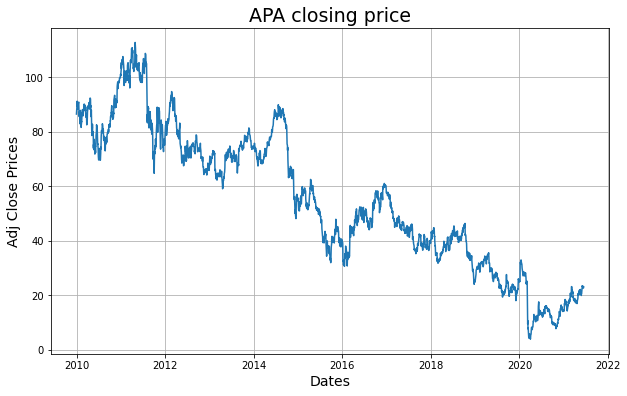

------------------------------------------------------------------------------------------------------------------------------------------------------


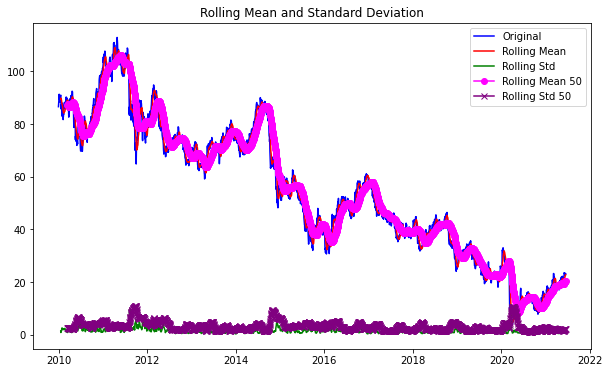

Results of dickey fuller test
Test Statistics                  -1.417150
p-value                           0.574027
No. of lags used                  6.000000
Number of observations used    2875.000000
critical value (1%)              -3.432627
critical value (5%)              -2.862546
critical value (10%)             -2.567305
dtype: float64
*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=
APA's Adj Close is not stationary, and the suggest d for arima is 0
*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=
------------------------------------------------------------------------------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

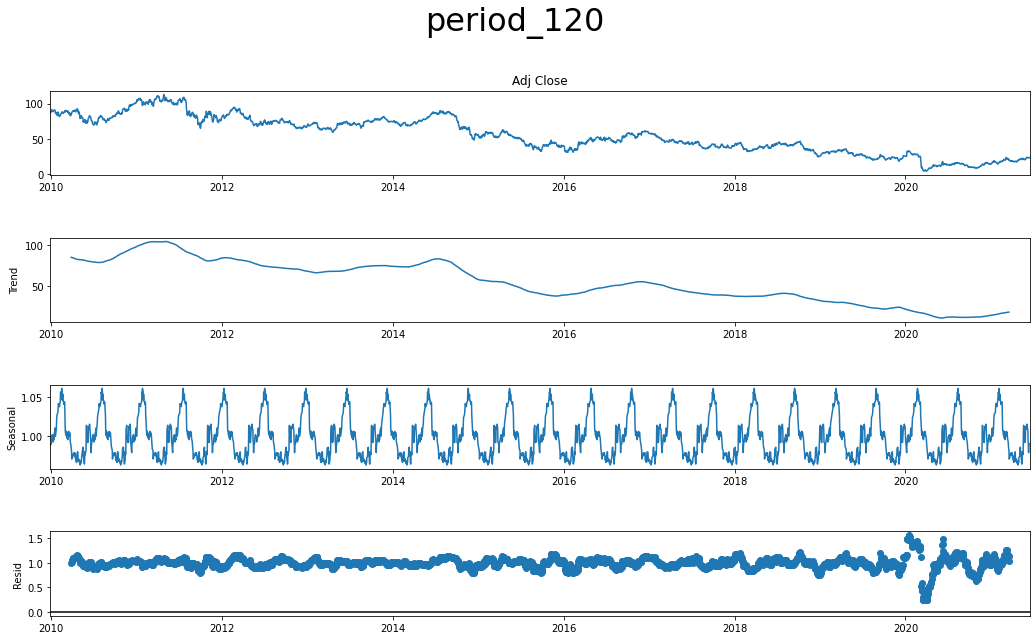

------------------------------------------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


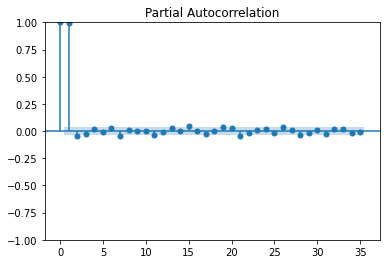

------------------------------------------------------------------------------------------------------------------------------------------------------


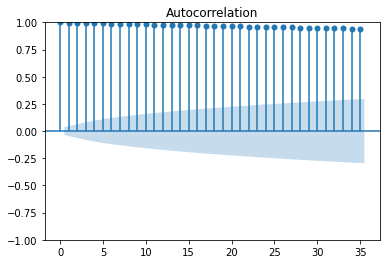

------------------------------------------------------------------------------------------------------------------------------------------------------
time: 9.13 s (started: 2021-12-27 17:52:41 +00:00)


In [1]:
from eda import EDA
from preprocessing import GetData, Prep
from pathlib import Path
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

get_data = GetData(Path('./dataset'))
obj_ticker = 'APA'
price_type = 'Adj Close'

apa_price_df = get_data.get_price_data(price_type=price_type, ticker_list=[obj_ticker])

apa_eda = EDA(apa_price_df, obj_ticker, price_type)
apa_eda.draw_ori_price()
print("-"*150)
apa_eda.test_stationarity()
print("-"*150)
apa_eda.seasonal_decompose(120)
print("-"*150)
apa_eda.draw_pacf(0)
print("-"*150)
apa_eda.draw_acf(0)
print("-"*150)

Now use log-transform on Adj Close to make it has stationarity


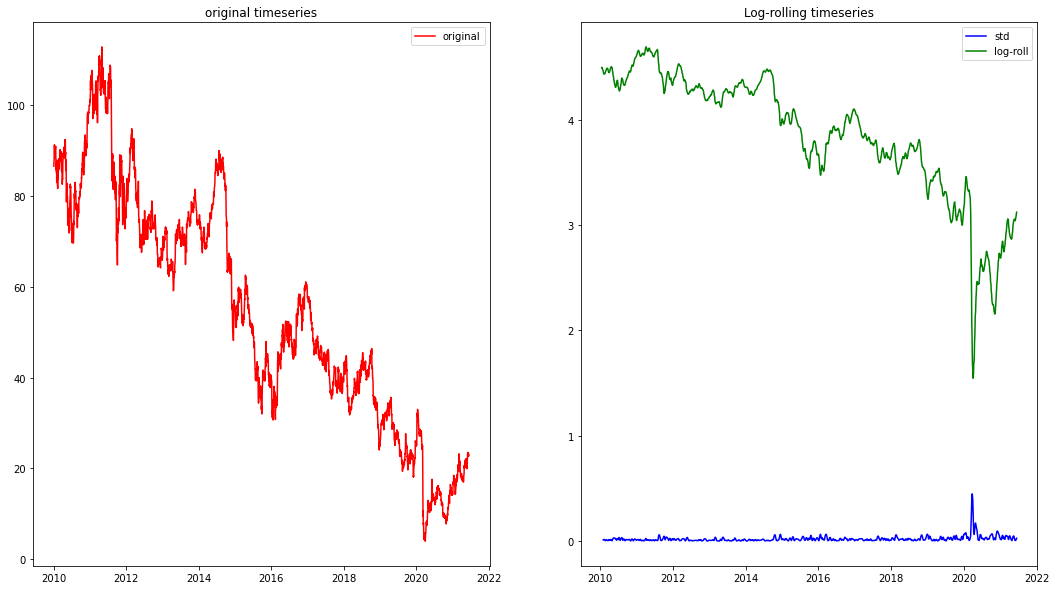

2009-12-31         NaN
2010-01-04         NaN
2010-01-05         NaN
2010-01-06         NaN
2010-01-07         NaN
                ...   
2021-06-08    3.087751
2021-06-09    3.095188
2021-06-10    3.102079
2021-06-11    3.112625
2021-06-14    3.122577
Name: Adj Close, Length: 2882, dtype: float64

time: 231 ms (started: 2021-12-27 17:52:50 +00:00)


In [2]:
prep = Prep()
log_apa_price = prep.log_rolling(apa_price_df[price_type], period=12)
display(log_apa_price)

In [3]:
log_apa_price = prep.deal_null(log_apa_price, fill=True, fill_method="bfill")
display(log_apa_price)
log_apa_price = prep.deal_null(log_apa_price)

Now check if input data has null:
    null rate :  0.003816793893129771


2009-12-31    4.495058
2010-01-04    4.495058
2010-01-05    4.495058
2010-01-06    4.495058
2010-01-07    4.495058
                ...   
2021-06-08    3.087751
2021-06-09    3.095188
2021-06-10    3.102079
2021-06-11    3.112625
2021-06-14    3.122577
Name: Adj Close, Length: 2882, dtype: float64

Now check if input data has null:
    null rate :  0.0
time: 3.4 ms (started: 2021-12-27 17:52:51 +00:00)


In [4]:
test_len = 10

# 過去資料
train_data = log_apa_price[:-test_len]
# 正確答案
test_data = log_apa_price[-test_len:]
# 建立模型
model = ARIMA(train_data, order=(2, 0, 35))  
fitted = model.fit()  
print(fitted.summary())
# 模型預測
fc= fitted.forecast(steps=len(test_data), alpha=0.05)  # 95% confidence

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 2872
Model:                ARIMA(2, 0, 35)   Log Likelihood               12746.591
Date:                Mon, 27 Dec 2021   AIC                         -25415.182
Time:                        17:54:09   BIC                         -25182.634
Sample:                             0   HQIC                        -25331.350
                               - 2872                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8611      0.381     10.127      0.000       3.114       4.608
ar.L1          1.9608      0.029     68.333      0.000       1.905       2.017
ar.L2         -0.9608      0.029    -33.539      0.0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


MSE: 5.516904035086898


,test,prediction
test,1.000000,0.245955
prediction,0.245955,1.000000


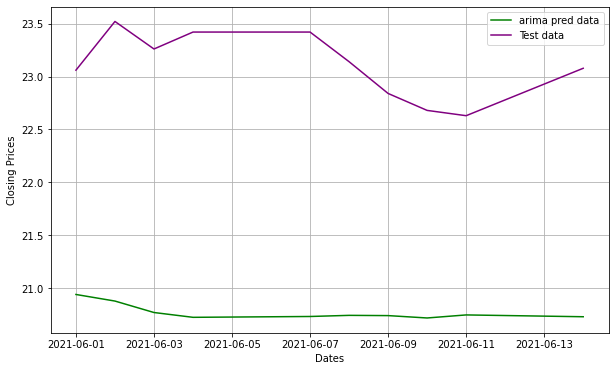

time: 96.8 ms (started: 2021-12-27 18:04:30 +00:00)


In [10]:
ori_test_data = apa_price_df[price_type][-test_len:]
pred = pd.Series(np.exp(fc).values, index=ori_test_data.index)
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(pred, 'green', label='arima pred data')
plt.plot(ori_test_data, 'purple', label='Test data')
plt.legend()

mse = mean_squared_error(ori_test_data, pred)
corr_df = pd.DataFrame({"test":ori_test_data, "prediction":pred})
print(f'MSE: {mse}')
display(corr_df.corr())
plt.show()